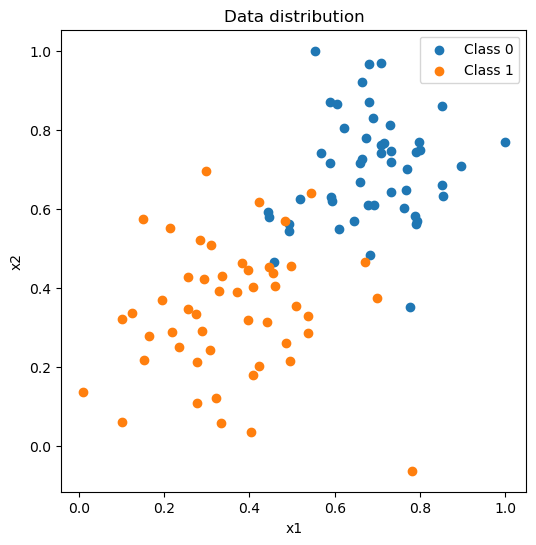

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data.csv', header=None, names=['x1','x2','label'])
X = data[['x1','x2']].values
y = data['label'].values

def plot_data(X, y):
    plt.figure(figsize=(6, 6))
    for label in np.unique(y):
        pts = X[y == label]
        plt.scatter(pts[:, 0], pts[:, 1], label=f'Class {label}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Data distribution')
    plt.show()

# Visualize
plot_data(X, y)


## Part 1: 

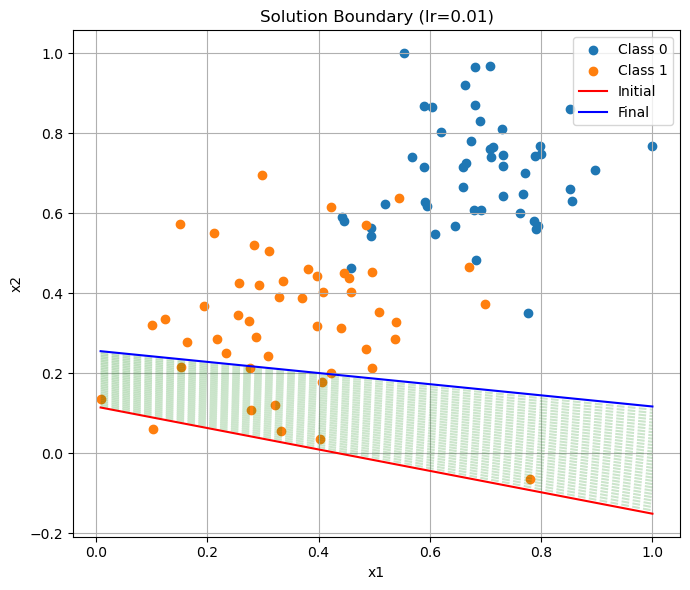

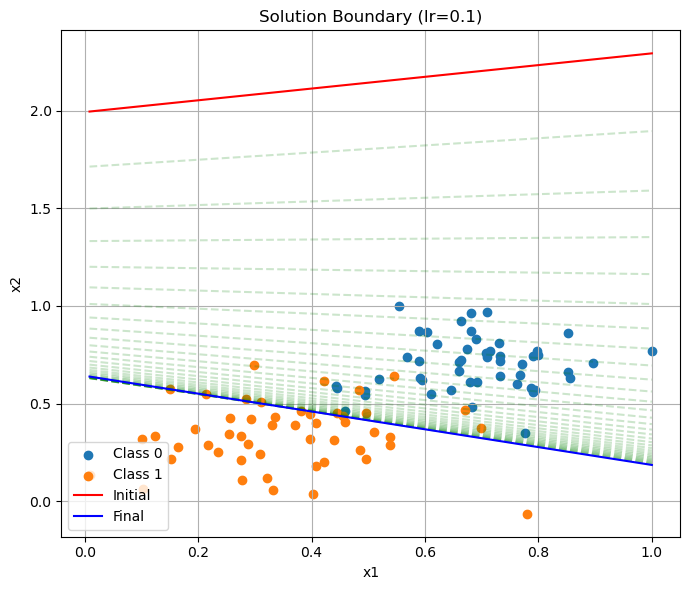

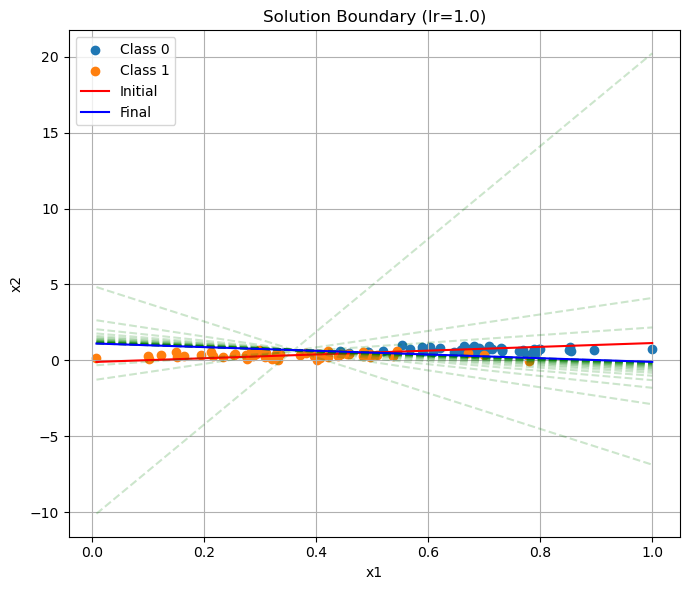

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def heuristic_perceptron_sigmoid(X, y, learning_rate=0.1, epochs=100):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    b = np.random.randn()
    lines = [(w.copy(), b)]

    for _ in range(epochs):
        z = X @ w + b
        y_pred = sigmoid(z)
        error = y - y_pred

        w += learning_rate * np.dot(error, X) / n_samples
        b += learning_rate * error.mean()

        lines.append((w.copy(), b))

    return w, b, lines

# Learning rates to compare
learning_rates = [0.01, 0.1, 1.0]

for lr in learning_rates:
    w_h, b_h, lines_h = heuristic_perceptron_sigmoid(X, y, learning_rate=lr, epochs=100)

    plt.figure(figsize=(7, 6))

    # Plot dataset
    for label in np.unique(y):
        pts = X[y == label]
        plt.scatter(pts[:, 0], pts[:, 1], label=f'Class {label}')

    # Plot decision boundaries during training
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    snapshots = lines_h[::max(1, len(lines_h)//30)]
    for i, (w_i, b_i) in enumerate(snapshots):
        y_vals = -(w_i[0] * x_vals + b_i) / w_i[1]
        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial')
        elif i == len(snapshots) - 1:
            plt.plot(x_vals, y_vals, 'b-', label='Final')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.2)

    plt.title(f'Solution Boundary (lr={lr})')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

### Analysis of Heuristic Perceptron Solution Boundaries by Learning Rate

These three plots illustrate how the **learning rate** affects convergence and boundary evolution in the heuristic perceptron:

1. **Learning Rate = 0.01**:
   - The initial boundary is far from optimal, and the model takes very small steps during training.
   - The final boundary is closer to a good separation, but progress is slow.
   - Most of the intermediate lines are clustered together, indicating very gradual weight updates and potential underfitting.

2. **Learning Rate = 0.1**:
   - This setting achieves a much better balance.
   - The boundary updates are more decisive, and the final decision line separates the classes effectively.
   - The smooth convergence of the lines shows a stable learning process without overshooting.

3. **Learning Rate = 1**:
   - The updates are very aggressive, leading to large shifts in the boundary.
   - The model may oscillate or diverge from optimal updates, evident by some chaotic boundary jumps.
   - The final line might still land close to optimal, but the training process is less stable.

**Conclusion**:  
A moderate learning rate (e.g., 0.1) tends to provide the best trade-off between convergence speed and stability. A rate too small slows training, while one too large risks erratic behavior or failure to converge.

## Part 2: 

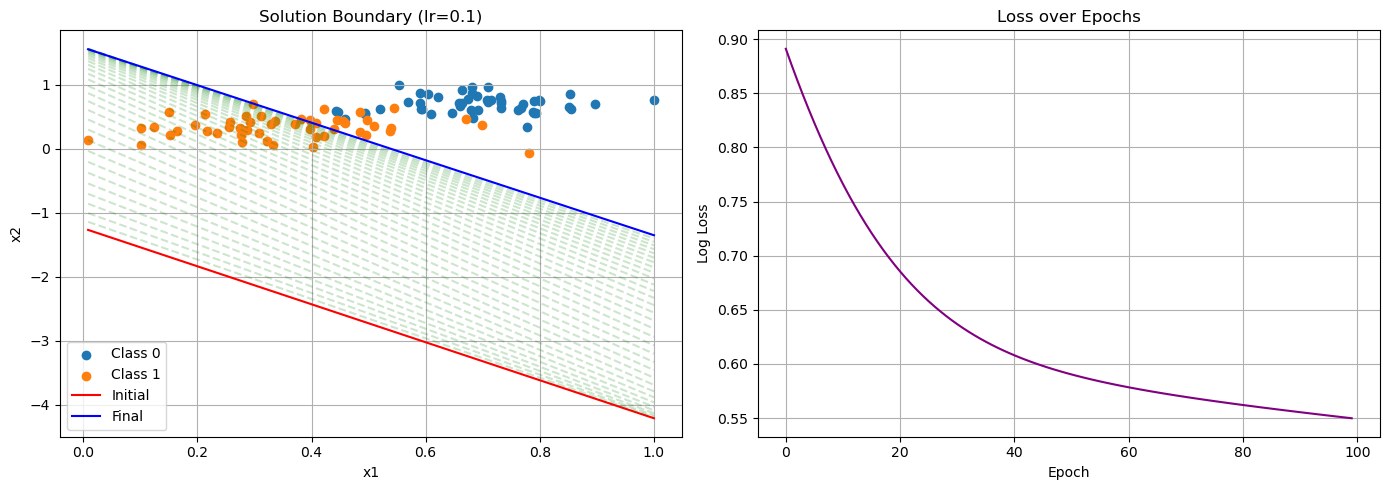

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def heuristic_perceptron_sigmoid(X, y, learning_rate=0.1, epochs=100):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    b = np.random.randn()
    lines = [(w.copy(), b)]
    losses = []

    for _ in range(epochs):
        z = X @ w + b
        y_pred = sigmoid(z)
        error = y - y_pred

        w += learning_rate * np.dot(error, X) / n_samples
        b += learning_rate * error.mean()

        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        losses.append(loss)
        lines.append((w.copy(), b))

    return w, b, lines, losses

# Use best perceived learning rate (e.g., 0.1)
best_lr = 0.1
w_best, b_best, lines_best, losses_best = heuristic_perceptron_sigmoid(X, y, learning_rate=best_lr, epochs=100)

# Plot both boundary evolution and loss curve side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot decision boundaries
for label in np.unique(y):
    axs[0].scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
snapshots = lines_best[::max(1, len(lines_best)//30)]
for i, (w_i, b_i) in enumerate(snapshots):
    y_vals = -(w_i[0] * x_vals + b_i) / w_i[1]
    if i == 0:
        axs[0].plot(x_vals, y_vals, 'r-', label='Initial')
    elif i == len(snapshots) - 1:
        axs[0].plot(x_vals, y_vals, 'b-', label='Final')
    else:
        axs[0].plot(x_vals, y_vals, 'g--', alpha=0.2)

axs[0].set_title(f'Solution Boundary (lr={best_lr})')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()
axs[0].grid()

# Plot loss curve
axs[1].plot(losses_best, color='purple')
axs[1].set_title('Loss over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Log Loss')
axs[1].grid()

plt.tight_layout()
plt.show()

### Analysis of Gradient Descent Perceptron (lr = 0.1)

#### Decision Boundary Evolution:
- The initial decision boundary (red) is poorly aligned with the data and starts with a steep slope.
- As training progresses, the intermediate decision boundaries (dashed green) gradually adjust, reflecting incremental updates to the weights.
- The final decision boundary (blue) aligns well between the two classes, demonstrating successful convergence.
- The intermediate lines fan out smoothly, indicating stable learning rather than erratic jumps.

#### Loss over Epochs:
- The log loss starts above 0.72 and steadily decreases over time, approaching 0.63 by the 100th epoch.
- The curve demonstrates exponential-like decay, showing consistent improvement in model accuracy.
- There is no sign of overfitting or plateauing, indicating that more epochs could yield further improvements.

**Conclusion:**
With a learning rate of 0.1, the gradient descent approach using sigmoid activation performs well — steadily reducing error and forming a stable, accurate decision boundary. This learning rate offers a good balance between convergence speed and stability.
